In [1]:
%load_ext autoreload
%autoreload 2
from readers import GetProcessedInputData
from feature_normalization import NormalizationMethod
from calculate_precision import calculate_results



gt_list, train_signatures, test_signatures = \
  GetProcessedInputData(NormalizationMethod.NONE, is_test_mode=False)


In [2]:
#For testing only.

#train_signatures = train_signatures[:10]
#test_signatures = test_signatures[:20]

In [25]:
#Only run it one time, distances are stored in a pickle file then
from compute_distances import ComputeDistances

distances = ComputeDistances(train_signatures, test_signatures)

In [ ]:
import pickle   
#Put distances dictionary into a pickle file
file = open("distances-full-set.pkl", "wb")
pickle.dump(distances, file)
file.close()

In [4]:
import pickle   
#Retrieve the distance dictionary from a pickle file
file_to_read = open("distances-full-set.pkl", "rb")
distances = pickle.load(file_to_read)
file_to_read.close()

In [12]:
# from now on calculates precision,recall for different thresholds
# and builds precision-recall curve

In [5]:
import sklearn.metrics
from calculate_precision import calculate_results

def precision_recall_curve(distances, train_signatures,gt_list, thresholds):
    precisions = []
    recalls = []
    
    for threshold in thresholds:
        _, precision,recall,_ = calculate_results(distances, train_signatures, dict(gt_list), threshold)
        precisions.append(precision)
        recalls.append(recall)

    return precisions, recalls

In [6]:
import numpy as np
thresholds= [0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65]
precisions, recalls = precision_recall_curve(distances, 
                                             train_signatures,
                                             gt_list, thresholds)
np_recalls = np.asarray([0] + recalls)
np_precisions = np.asarray([1] + precisions)
AP = np.sum((np_recalls[1:] - np_recalls[:-1]) * np_precisions[:-1])
print(f"Average precision is : {AP}")

Average precision is : 0.9657105754107382


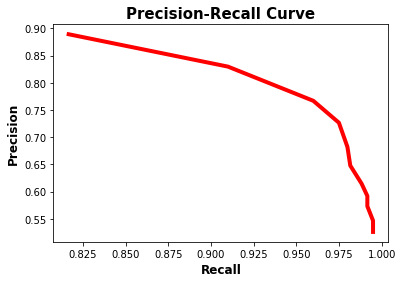

In [7]:
import matplotlib.pyplot as plt
plt.plot(recalls, precisions, linewidth=4, color="red")
plt.xlabel("Recall", fontsize=12, fontweight='bold')
plt.ylabel("Precision", fontsize=12, fontweight='bold')
plt.title("Precision-Recall Curve", fontsize=15, fontweight="bold")
plt.show()

In [8]:
# calculate confusion_matrix,precision, recall for threshold 0.25
_, _, _, y_pred = calculate_results(distances, train_signatures, dict(gt_list), 0.25)

# Creation of the output
outputData = []
for i in range(1,31):
    profile = []
    profile.append(f"{i:03}")
    for key, value in y_pred.items():
        if int(key[:3]) == i:
            user = key[:3]
            sign_id = key[4:6]
            if value == 'g':
                dissimilarity = 0
            else:
                dissimilarity = 1
            profile.append(sign_id)
            profile.append(dissimilarity)
    outputData.append(profile)

In [10]:
# Write output file 
import csv
with open("sign-ver.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerows(outputData)